In [1]:
using Pkg; Pkg.activate(".")
include("../Grid/Unstaggered.jl")

Grid

In [2]:
g = 9.81

Lx = 100
nx = 25

grid = Grid(nx, Lx)
x_full = LinRange(0, Lx, nx+1)

26-element LinRange{Float64}:
 0.0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,…,76.0,80.0,84.0,88.0,92.0,96.0,100.0

In [3]:
function partial_x!(dfdx, f, grid)
    nx, dx = grid.nx, grid.dx
    dfdx[1] = 1/(dx) * (f[1] - f[nx])
    for i in 2:nx
        dfdx[i] = 1/(dx) * (f[i] - f[i-1])
    end
end

function adv_x_Euler!(adv, dfdx, f, a, grid)
    partial_x!(dfdx, f, grid)
    @. adv = a * dfdx
end

adv_x_Euler! (generic function with 1 method)

In [4]:
#Initialising variables
x = grid.x
dx = grid.dx

phi_old = sin.(2*π*x_full/(Lx))
phi_old = phi_old[1:nx]
phi_new = zeros(nx)
adv = zeros(nx)
dfdx = zeros(nx)

a = 1 #Speed of advection

#Time variables
t_start = 0
t_end = 100
dt = 1

a = 1

#True solution
phi_true = sin.(2*π*x_full/(Lx))[1:nx]

#Needed for making animations
n_steps = Int(t_end/dt)
phi_data = zeros(nx, n_steps + 1)
phi_true_data = zeros(nx, n_steps + 1)

#Advecting the variable for fixed number of time steps

count = 1

for t in t_start:dt:t_end
    adv = adv_x_Euler!(adv, dfdx, phi_old, a, grid)
    phi_new = phi_old - dt*adv
    @. phi_true = sin(2*π*(x_full[1:nx] - a*(t))/Lx)
    phi_old = phi_new
    phi_data[:, count] = phi_old
    phi_true_data[:, count] = phi_true
    count = count+1
end

┌ Info: Saved animation to 
│   fn = /Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/Advection/tutorial_anim_fps30.gif
└ @ Plots /Users/dhruvbhagtani/.julia/packages/Plots/YVapH/src/animation.jl:104


Plots.AnimatedGif("/Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/Advection/tutorial_anim_fps30.gif")
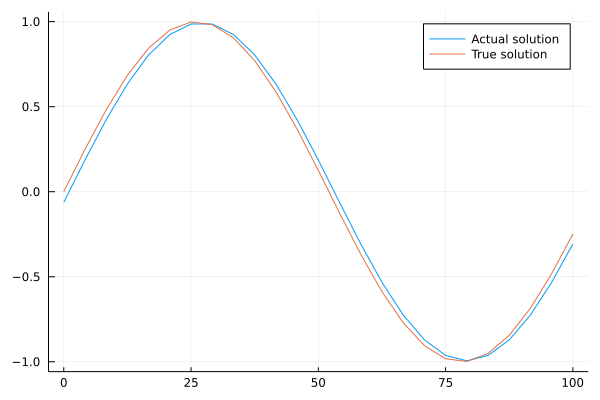

In [5]:
using Plots
anim = @animate for i = 1:n_steps
    plot(x, phi_data[:, i], label = "Actual solution")
    plot!(x, phi_true_data[:, i], label = "True solution")
end
 
gif(anim, "tutorial_anim_fps30.gif", fps = 8)